# Workshop # 9 - K-Means Clustering

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [7]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [8]:
x = df3.iloc[:,1:7]
x.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,0,1
1,1,38.0,1,0,1,0
2,3,26.0,0,0,1,0
3,1,35.0,1,0,1,0
4,3,35.0,0,0,0,1


In [32]:
from sklearn.cluster import KMeans

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1234)
y_kmeans = kmeans.fit_predict(x)

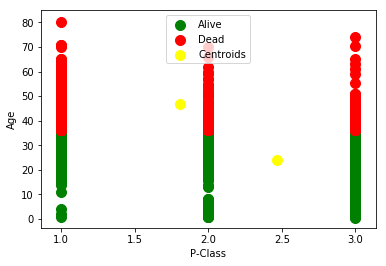

In [35]:
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], s= 100, c='green', label='Alive')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], s= 100, c='red', label='Dead')
plt.xlabel("P-Class")
plt.ylabel("Age")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c='yellow', label='Centroids')
plt.legend()

In [10]:
y = np.array(df3['Survived'])

In [11]:
clf = KMeans(n_clusters=2)
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
found = 0
for i in range(len(x)):
    #new_prediction = np.array(x[i].astype(float))
    new_prediction = np.array(x)
    new_prediction = new_prediction.reshape(-1, len(new_prediction))
    prediction = clf.predict(new_prediction)
    if prediction[0] == y[i]:
        found += 1

accuracy = (found/len(x))*100
accuracy

ValueError: Incorrect number of features. Got 891 features, expected 6